## Chi Square(X2) Test

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.metrics import accuracy_score


In [3]:
titanic=sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Chi Square test work only Categorical dataset. So removing null and filtering the Categorical Fields

In [5]:
titanic.isnull().sum()/titanic.shape[0]

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [32]:
titanic.shape

(891, 15)

In [33]:
titanic.drop(labels=['age','deck'],axis=1,inplace=True)

In [34]:
titanic=titanic.dropna()

In [35]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [36]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [84]:
data=titanic[['pclass', 'sex', 'sibsp', 'parch', 'embarked',
        'who', 'alone']].copy()

In [85]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


### Data Conversion in numeric data

In [86]:
sex={'male':0,'female':1}
data['sex']=data['sex'].map(sex)

In [87]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [88]:
data.dtypes

pclass       int64
sex          int64
sibsp        int64
parch        int64
embarked    object
who         object
alone         bool
dtype: object

In [89]:
port={'S':0,'C':1,'Q':2}
who={'man':0,'woman':1,'child':2}
alone={False:0,True:1}

data['embarked']=data['embarked'].map(port)

data['who']=data['who'].map(who)

data['alone']=data['alone'].map(alone)

In [90]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


In [83]:
data.who.unique()

array([1, 2], dtype=int64)

### Do a Fisher-Score

In [96]:
x=data.copy()
y=titanic['survived']

In [97]:
print(x.shape,'||',y.shape)

(889, 7) || (889,)


In [99]:
x.dtypes

pclass      int64
sex         int64
sibsp       int64
parch       int64
embarked    int64
who         int64
alone       int64
dtype: object

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
f_score=chi2(x_train,y_train)

We are looking for the P values which are less than 0.05

In [110]:
f_score
#First is f scoore value
#2nd is p value which should be <0.05

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [106]:
p_values=pd.Series(f_score[1],index=x_train.columns)
p_values.sort_values(ascending=True,inplace=True)

In [107]:
p_values

#who and sex are having extremly low
#these are the most important value.

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

##### Observations

- Who and sex has very low value. Hence those are most important feature. 
- Probably top 5 feature are going to be important but Sibsp is having highest P value. Hence it is least important variable.  


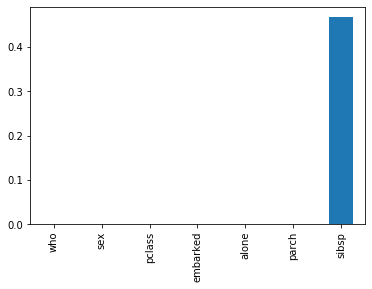

In [108]:
p_values.plot.bar()

In [111]:
x_train_2=x_train[['who','sex']]
x_test_2=x_test[['who','sex']]

In [116]:
def run_randomforest(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print("Accuracy:=",accuracy_score(y_test,y_pred))

In [117]:
%%time
run_randomforest(x_train_2,x_test_2,y_train,y_test)

#It is prove that using this 2 features , we are getting good accuracy. 
#It means, these two features are more significant.

Accuracy:= 0.7191011235955056
Wall time: 403 ms


In [118]:
x_train_3=x_train[['who','sex','pclass']]
x_test_3=x_test[['who','sex','pclass']]

In [132]:
%%time
run_randomforest(x_train_3,x_test_3,y_train,y_test)

#Accuracy increased by 2 %

Accuracy:= 0.7415730337078652
Wall time: 444 ms


In [120]:
x_train_4=x_train[['who','sex','pclass','embarked']]
x_test_4=x_test[['who','sex','pclass','embarked']]

#Accuracy increased by 1%

In [121]:
%%time
run_randomforest(x_train_4,x_test_4,y_train,y_test)

Accuracy:= 0.7584269662921348
Wall time: 428 ms


In [124]:
x_train_5=x_train[['who','sex','pclass','embarked','alone']]
x_test_5=x_test[['who','sex','pclass','embarked','alone']]

In [125]:
%%time
run_randomforest(x_train_5,x_test_5,y_train,y_test)

#Observed the small decrease

Accuracy:= 0.7528089887640449
Wall time: 422 ms


In [126]:
x_train_6=x_train[['who','sex','pclass','embarked','alone','parch']]
x_test_6=x_test[['who','sex','pclass','embarked','alone','parch']]

In [127]:
%%time
run_randomforest(x_train_6,x_test_6,y_train,y_test)

#Observed large decrease

Accuracy:= 0.7359550561797753
Wall time: 455 ms


In [130]:
x_train_7=x_train[['who','sex','pclass','embarked','alone','parch','sibsp']]
x_test_7=x_test[['who','sex','pclass','embarked','alone','parch','sibsp']]

In [131]:
%%time
run_randomforest(x_train_7,x_test_7,y_train,y_test)

#Observed no change

Accuracy:= 0.7359550561797753
Wall time: 436 ms


In [ ]:
#'alone','parch','sibsp' are not having much information although it is adding a noise in prediction. 